In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bài 3

In [47]:
data = pd.read_csv('dataset.csv').values
N, d = data.shape
X = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

Biểu diễn dữ liệu

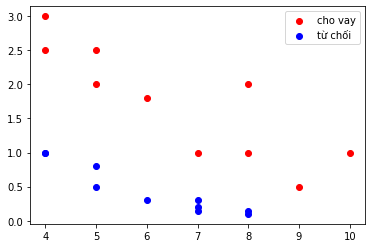

In [48]:
plt.scatter(X[:10, 0], X[:10, 1], c='r', label='cho vay')
plt.scatter(X[10:, 0], X[10:, 1], c='b', label='từ chối')
plt.legend(loc='best')
plt.show()

In [49]:
Xbar = np.concatenate((np.ones_like(y), X), axis=1)

In [35]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))


def prob(X, w):
    return sigmoid(X.dot(w))


def loss(X, y, w):
    y_hat = prob(X, w)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))


def grad(X, y, w):
    y_hat = prob(X, w)
    return np.mean(X.T.dot(y_hat - y))


def logistic_regression(X, y, w, lr):
    loss_hist = [loss(X, y, w)]

    for i in range(10000):
        w -= lr*grad(X, y, w)
        if np.linalg.norm(grad(X, y, w)) / len(w) < 1e-8:
            break
        loss_hist.append(loss(X, y, w))
        
    return w, loss_hist


Learning rate vừa đủ

In [55]:
w_init = np.random.randn(3, 1)
w, loss_hist = logistic_regression(Xbar, y, w_init, 0.01)
print(w)
print(loss_hist[-1])

[[-1.70659397]
 [ 0.18528243]
 [ 0.64402238]]
0.4980062859567373


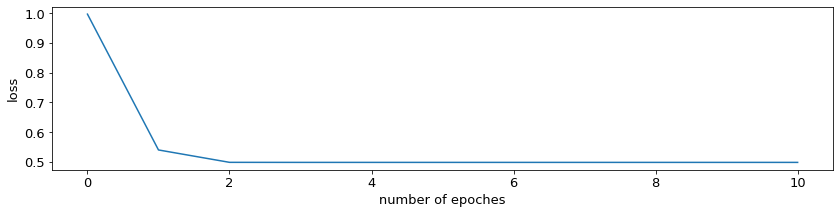

In [57]:
plt.figure(figsize=(14, 3))
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Vẽ đường thằng tìm được

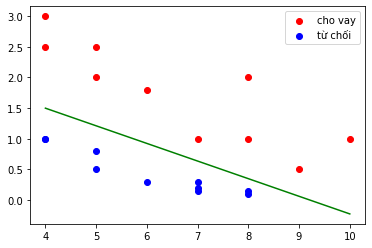

In [56]:
t = 0.5
plt.plot((4, 10), (-(w[0] + 4*w[1] + np.log(1/t-1))/w[2],
                   -(w[0] + 10*w[1] + np.log(1/t-1))/w[2]), 'g')
plt.scatter(X[:10, 0], X[:10, 1], c='r', label='cho vay')
plt.scatter(X[10:, 0], X[10:, 1], c='b', label='từ chối')
plt.legend(loc='best')
plt.show()


Learning rate lớn

[[-2.44665014]
 [ 0.0321865 ]
 [-1.04452785]]
2.0669013514006354


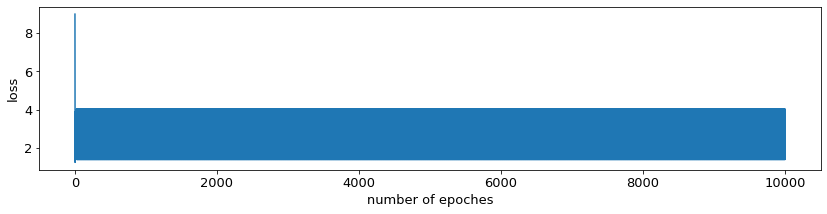

In [74]:
w_init = np.random.randn(3, 1)
w, loss_hist = logistic_regression(Xbar, y, w_init, 0.05)
print(w)
print(loss_hist[-1])

plt.figure(figsize=(14, 3))
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate nhỏ

[[-0.84144573]
 [ 0.37299715]
 [-1.33111902]]
1.3400833886077146


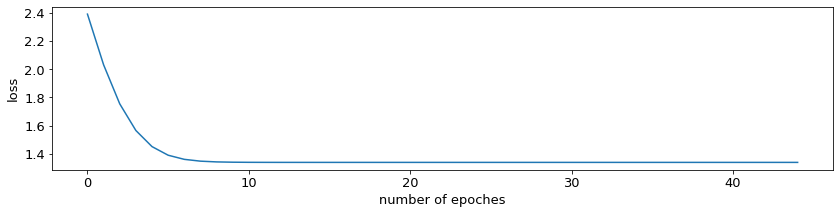

In [75]:
w_init = np.random.randn(3, 1)
w, loss_hist = logistic_regression(Xbar, y, w_init, 0.005)
print(w)
print(loss_hist[-1])

plt.figure(figsize=(14, 3))
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

# Bài 4

Tạo dữ liệu

In [66]:
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]]).reshape(-1, 2)
y = np.array([0, 0, 1, 1]).reshape(-1, 1)
Xbar = np.concatenate((np.ones((4,1)), X), axis=1)

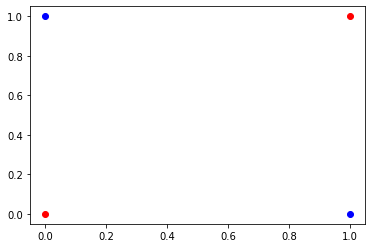

In [59]:
plt.scatter(X[:2, 0], X[:2, 1], c='r')
plt.scatter(X[2:, 0], X[2:, 1], c='b')
plt.show()

In [60]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))


def prob(X, w):
    return sigmoid(X.dot(w))


def loss(X, y, w):
    y_hat = prob(X, w)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))


def grad(X, y, w):
    y_hat = prob(X, w)
    N = X.shape[0]
    return 1/N * X.T.dot(y_hat - y)


def logistic_regression(X, y, w, lr):
    loss_hist = [loss(X, y, w)]

    for i in range(10000):
        w -= lr*grad(X, y, w)
        if np.linalg.norm(grad(X, y, w)) / len(w) < 1e-8:
            break
        loss_hist.append(loss(X, y, w))
        
    return w, loss_hist


In [63]:
w_init = np.random.randn(3, 1)
w, loss_hist = logistic_regression(Xbar, y, w_init, 0.01)
print(w)
print(loss_hist[-1])

[[-0.02422743]
 [ 0.02181818]
 [ 0.01903253]]
0.6931751829284345


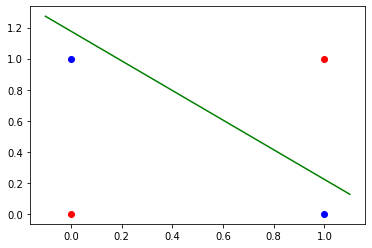

In [64]:
t = 0.5
plt.plot((-0.1, 1.1), (-(w[0] + 0*w[1] + np.log(1/t-1))/w[2],
                   -(w[0] + 1*w[1] + np.log(1/t-1))/w[2]), 'g')
plt.scatter(X[:2, 0], X[:2, 1], c='r')
plt.scatter(X[2:, 0], X[2:, 1], c='b')
plt.show()


&rarr; <b>Một đường thẳng không thể phân chia 4 điểm dữ liệu này<b>

## Sử dụng hàm phi tuyến

#### Thay đường w0 + w1x1 + w2x2 = 0 bằng đường x2 = a*(x1-b)/(x1-c)
Đặt x3 = x1x2. Ta có: w0 + w1x1 + w2x2 + w3x1x2 = 0

In [71]:
x1 = X[:, 0].reshape(-1, 1)
x2 = X[:, 1].reshape(-1, 1)
x3 = (X[:, 0]*X[:, 1]).reshape(-1, 1)
Xbar = np.concatenate((np.ones_like(y), x1, x2, x3), axis = 1)

In [73]:
w_init = np.random.randn(4, 1)
w, loss_hist = logistic_regression(Xbar, y, w_init, 0.01)
print(w)
print(loss_hist[-1])

[[-0.75980426]
 [ 2.0973576 ]
 [ 2.11152197]
 [-5.31197417]]
0.24781686117817076


In [86]:
print(np.round(prob(Xbar, w)))

[[0.]
 [0.]
 [1.]
 [1.]]


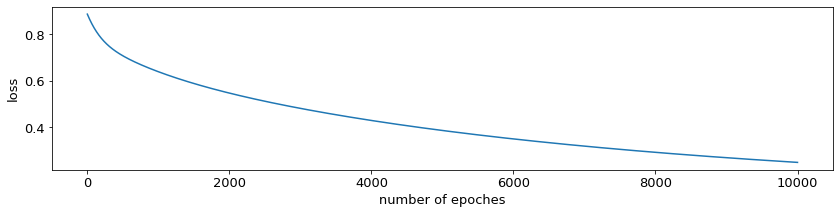

In [81]:
plt.figure(figsize=(14, 3))
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

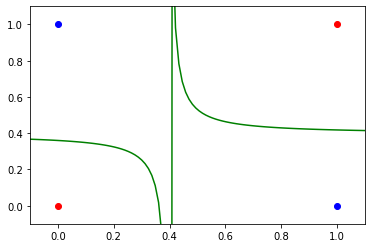

In [80]:
x0 = np.linspace(-0.1, 1.1, num=100)
y0 = -(w[1]*x0 + w[0]) / (w[3]*x0 + w[2])
plt.plot(x0, y0, c='g')

plt.scatter(X[:2, 0], X[:2, 1], c='r')
plt.scatter(X[2:, 0], X[2:, 1], c='b')
plt.axis([-0.1,1.1,-0.1,1.1])
plt.show()

&rarr; <b>Hàm phân thức cho kết quả tốt<b>

#### Thay bằng đường 

# Bài 5

Loading data

In [10]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selecting features

In [12]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

Splitting data

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Model Development and Prediction

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=10000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Model Evaluation using Confusion Matrix


In [16]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

Visualizing Confusion Matrix using Heatmap


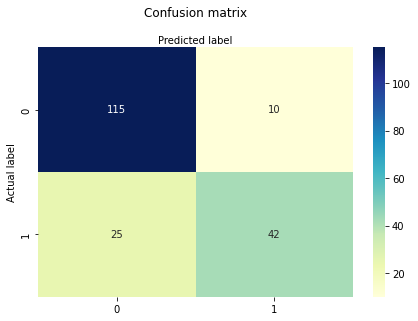

In [18]:
# import required modules
# import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
# Text(0.5,257.44,'Predicted label');

 Confusion Matrix Evaluation Metrics


In [19]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



precision = TP/(TP+FP) <br>
recall = TP/(TP+FN) <br>
accuracy = (TP+TN)/(P+N) <br>
2/F1 = 1/pre + 1/recall

ROC Curve


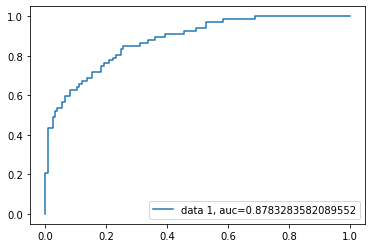

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()